In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://tracreports.org/immigration/detentionstats/facilities.html"

response = requests.get(url)
print("Status code:", response.status_code)

html = response.text
print("Total HTML length:", len(html))

# Show a middle slice of the HTML (can reveal useful content)
mid = len(html) // 2
preview_span = 1000
print("\n--- HTML preview (middle chunk) ---")
print(html[max(0, mid - preview_span//2) : mid + preview_span//2])


Status code: 200
Total HTML length: 9933

--- HTML preview (middle chunk) ---
control form-control-sm" v-model="zipSearch">
						</div>
                        <div class="col-2 form-group">
							<label for="dateSearch" class="form-label">Current as of</label>
                            <input id="dateSearch" placeholder="Filter by Date" 
								autocomplete="off" name="query" class="form-control form-control-sm" v-model="dateSearch">
						</div>
                    </div>
                </fieldset>
            </form>
        </div>

 		<table class="table table-sm table-striped table-bordered">
		<thead>
			<tr>
				<th>Name</th>
				<th>City</th>
				<th>State</th>
				<th>Zip</th>
				<th>Type Detailed*</th>
				<th>Current Guaranteed Minimum</th>
				<th>Average Daily Population</th>
				<th>Current as of**</th>
			</tr>
		</thead>
		<tfoot>
		<tr><td colspan=8>* Types of Facilities<BR /> 
		<ul>
			<li><strong>BOP (Federal Bureau of Prisons)</strong>: A facility operated b

Python(61740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Opening page...
Page loaded.


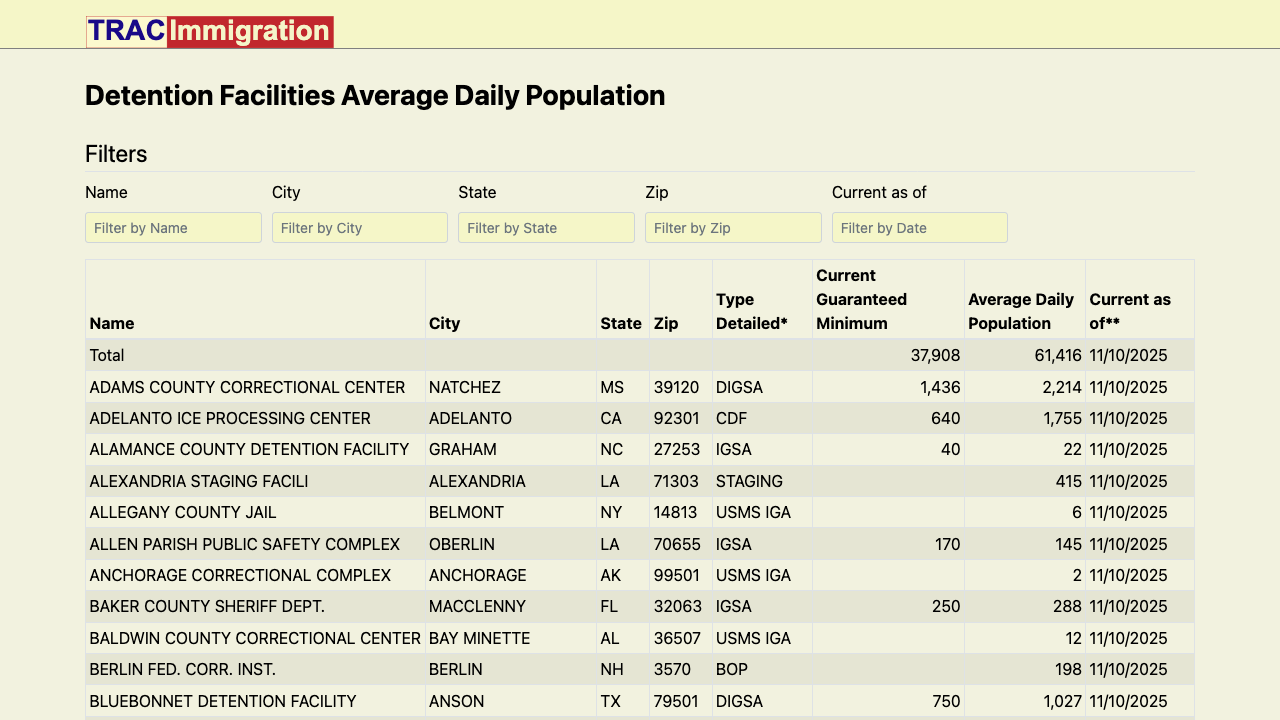


Rendered HTML length: 3287095

--- Rendered HTML preview (middle chunk) ---
ME NORTH SERVICE PROCESSING CENTER</td> <td>MIAMI</td> <td>FL</td> <td>33194</td> <td>SPC</td> <td align="right">450</td> <td align="right">                 384</td> <td>11/28/2022</td></tr><tr><td>CCA, FLORENCE CORRECTIONAL CENTER</td> <td>FLORENCE</td> <td>AZ</td> <td>85132</td> <td>USMS IGA</td> <td align="right"></td> <td align="right">                 372</td> <td>11/28/2022</td></tr><tr><td>RIVER CORRECTIONAL CENTER</td> <td>FERRIDAY</td> <td>LA</td> <td>71334</td> <td>DIGSA</td> <td align="right">361</td> <td align="right">                 360</td> <td>11/28/2022</td></tr><tr><td>JOE CORLEY PROCESSING CTR</td> <td>CONROE</td> <td>TX</td> <td>77301</td> <td>IGSA</td> <td align="right"></td> <td align="right">                 325</td> <td>11/28/2022</td></tr><tr><td>BUFFALO (BATAVIA) SERVICE PROCESSING CENTER</td> <td>BATAVIA</td> <td>NY</td> <td>14020</td> <td>SPC</td> <td align="right">400</td> <td alig

In [ ]:
import asyncio
from playwright.async_api import async_playwright

async def load_page():
    async with async_playwright() as p:
        browser = await p.firefox.launch(headless=True)
        page = await browser.new_page()
        
        print("Opening page...")
        await page.goto("https://tracreports.org/immigration/detentionstats/facilities.html", wait_until="networkidle")
        print("Page loaded.")

        # Get rendered HTML
        rendered_html = await page.content()
        print("\nRendered HTML length:", len(rendered_html))

        # Show the middle 1000 characters
        mid = len(rendered_html) // 2
        preview_span = 1000
        print("\n--- Rendered HTML preview (middle chunk) ---")
        print(rendered_html[max(0, mid - preview_span//2) : mid + preview_span//2])

        await browser.close()
        return rendered_html

rendered_html = await load_page()


In [21]:
from bs4 import BeautifulSoup

soup_rendered = BeautifulSoup(rendered_html, "html.parser")

# Try to find the main data table
table = soup_rendered.find("table")
print("Table found:", table is not None)

if table is None:
    raise RuntimeError("Could not find any <table> in the rendered HTML.")

# Get column headers from the <thead>
thead = table.find("thead")
headers = [th.get_text(strip=True) for th in thead.find_all("th")]
print("Headers:", headers)

# Extract all data rows
rows_data = []
for tr in table.find_all("tr"):
    tds = tr.find_all("td")
    if not tds:
        continue  # skip header or non-data rows
    row = [td.get_text(strip=True) for td in tds]
    # Keep rows that match header length (should be 8)
    if len(row) == len(headers):
        rows_data.append(row)

print("Number of data rows found:", len(rows_data))
rows_data[:5]  # preview first 5 rows


Table found: True
Headers: ['Name', 'City', 'State', 'Zip', 'Type Detailed*', 'Current Guaranteed Minimum', 'Average Daily Population', 'Current as of**']
Number of data rows found: 16794


[['Total', '', '', '', '', '37,908', '61,416', '11/10/2025'],
 ['ADAMS COUNTY CORRECTIONAL CENTER',
  'NATCHEZ',
  'MS',
  '39120',
  'DIGSA',
  '1,436',
  '2,214',
  '11/10/2025'],
 ['ADELANTO ICE PROCESSING CENTER',
  'ADELANTO',
  'CA',
  '92301',
  'CDF',
  '640',
  '1,755',
  '11/10/2025'],
 ['ALAMANCE COUNTY DETENTION FACILITY',
  'GRAHAM',
  'NC',
  '27253',
  'IGSA',
  '40',
  '22',
  '11/10/2025'],
 ['ALEXANDRIA STAGING FACILI',
  'ALEXANDRIA',
  'LA',
  '71303',
  'STAGING',
  '',
  '415',
  '11/10/2025']]

In [22]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame(rows_data, columns=headers)

print("Full DataFrame shape (rows, columns):", df.shape)
df.head()

Full DataFrame shape (rows, columns): (16794, 8)


,Name,City,State,Zip,Type Detailed*,Current Guaranteed Minimum,Average Daily Population,Current as of**
0,Total,,,,,"37,908","61,416",11/10/2025
1,ADAMS COUNTY CORRECTIONAL CENTER,NATCHEZ,MS,39120,DIGSA,"1,436","2,214",11/10/2025
2,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,92301,CDF,640,"1,755",11/10/2025
3,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,27253,IGSA,40,22,11/10/2025
4,ALEXANDRIA STAGING FACILI,ALEXANDRIA,LA,71303,STAGING,,415,11/10/2025


In [23]:
# Make a copy so we don't accidentally overwrite original data
df_clean = df.copy()

# Rename the date column to something easier to work with
df_clean = df_clean.rename(columns={"Current as of**": "current_as_of"})

# Convert the date column to real datetime
df_clean["current_as_of"] = pd.to_datetime(df_clean["current_as_of"], errors="coerce")

# Define what makes a facility "unique"
facility_keys = ["Name", "City", "State", "Zip"]

# Sort by date so newest is last
df_clean = df_clean.sort_values("current_as_of")

# Keep only the newest row per facility
df_latest = df_clean.groupby(facility_keys, as_index=False).last()

print("Rows after keeping newest per facility:", len(df_latest))
df_latest.head()


Rows after keeping newest per facility: 2238


,Name,City,State,Zip,Type Detailed*,Current Guaranteed Minimum,Average Daily Population,current_as_of
0,,,,,,,0,2024-01-12
1,ABBOTT HOUSE,IRVINGTON,NY,10533,ORR,,23,2021-01-07
2,ABBOTT HOUSE - BRONX,BRONX,NY,10453,ORR,,13,2021-01-07
3,ABERDEEN CITY JAIL,ABERDEEN,WA,98520,IGSA,,0,2021-01-07
4,ABILENE HOLD ROOM,ABILENE,TX,79601,HOLD,,0,2021-01-07


In [24]:
print("Final DataFrame shape (rows, columns):", df_latest.shape)
df_latest.head(20)


Final DataFrame shape (rows, columns): (2238, 8)


,Name,City,State,Zip,Type Detailed*,Current Guaranteed Minimum,Average Daily Population,current_as_of
0,,,,,,,0,2024-01-12
1,ABBOTT HOUSE,IRVINGTON,NY,10533,ORR,,23,2021-01-07
2,ABBOTT HOUSE - BRONX,BRONX,NY,10453,ORR,,13,2021-01-07
3,ABERDEEN CITY JAIL,ABERDEEN,WA,98520,IGSA,,0,2021-01-07
4,ABILENE HOLD ROOM,ABILENE,TX,79601,HOLD,,0,2021-01-07
5,ABILENE REGIONAL MED CTR,ABILENE,TX,79606,HOSPITAL,,0,2021-01-07
6,ABRAXAS ACADEMY DETENTION CENTER,MORGANTOWN,PA,19543,JUVENILE,,0,2021-01-07
7,ABRAXAS-H ARCIA CENTER,SAN ANTONIO,TX,78232,ORR,,0,2021-01-07
8,"ACI (CRANSTON, RHODE ISLAND)",CRANSTON,RI,2920,IGSA,,0,2021-01-07
9,ADA COUNTY JAIL,BOISE,ID,83704,IGSA,,0,2021-01-07


In [25]:
df_latest.groupby("State")['Average Daily Population'].sum()

State
                                             061,416000
AK                                   200000000000000000
AL                       120100100884200000039353921230
AR                                  0000000014092000072
AZ    00006050037857837101800003670001,3101,42031938...
CA    1,75525000000063670010000001971200000300000001...
CO    000000000000000000001,146630008000097400000000...
CT                                     0001000000100000
DC                                                  000
DE                                                  100
FL    0288234003412000002066823023459100000000031000...
GA    1330086000001002001132275287036750244233639650...
GU                                              0016066
HI                                                73180
IA    0010000000000003700430110001805238252601090000...
ID                      0000000000001030080220043000000
IL    0000200000000000010030003500000000835720201000...
IN                        1192041239253600

In [26]:
print(df_latest["Average Daily Population"].head(10))
print("\nDtype:", df_latest["Average Daily Population"].dtype)


0     0
1    23
2    13
3     0
4     0
5     0
6     0
7     0
8     0
9     0
Name: Average Daily Population, dtype: object

Dtype: object


In [27]:
# Make a numeric version of Average Daily Population
col = "Average Daily Population"

# Remove commas and spaces, then convert to numeric
df_latest[col] = (
    df_latest[col]
    .astype(str)              # make sure it's string
    .str.replace(",", "")     # remove thousand separators
    .str.strip()              # remove leading/trailing spaces
)

df_latest[col] = pd.to_numeric(df_latest[col], errors="coerce")

print("New dtype:", df_latest[col].dtype)
print(df_latest[col].head(10))


New dtype: int64
0     0
1    23
2    13
3     0
4     0
5     0
6     0
7     0
8     0
9     0
Name: Average Daily Population, dtype: int64


In [28]:
state_adp = (
    df_latest
    .groupby("State")["Average Daily Population"]
    .sum()
    .sort_values(ascending=False)
)

state_adp


State
      61416
TX    55284
LA    19780
CA    11283
AZ     9713
GA     7645
MS     7444
PA     5181
WA     5070
FL     4908
NM     4615
NY     3379
VA     2965
CO     2203
NJ     2199
MI     2109
NV     1259
KY     1151
OH      990
OK      965
MA      963
IN      724
MN      589
NH      498
MO      425
WI      382
KS      328
IA      314
AL      301
IL      220
NE      193
RI      175
TN      148
HI       91
ME       74
WV       57
MD       55
WY       55
PR       51
NC       48
MP       44
UT       41
ND       35
ID       32
GU       28
VT       26
AR       25
SC       18
SD       18
OR        8
MT        4
AK        2
CT        2
DE        1
DC        0
VI        0
Name: Average Daily Population, dtype: int64

In [31]:
df_latest.to_csv("detainees.csv")

print("Saved to: detainees.csv")


Saved to: detainees.csv
